# Problem statement

Use relevant machine learning model to predict total sales using features money spent on Advertising/Marketing individual fields.

# Import Basic Libraries

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load Data Set

In [2]:
data=pd.read_csv("Advertising (2).csv")

In [3]:
data

,Unnamed : 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Basic Checks

In [4]:
# Shape 
data.shape

(200, 5)

In [5]:
# print all columns
data.columns

Index(['Unnamed :  0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
# Dtypes
data.dtypes

Unnamed :  0      int64
TV              float64
radio           float64
newspaper       float64
sales           float64
dtype: object

In [7]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed :  0  200 non-null    int64  
 1   TV            200 non-null    float64
 2   radio         200 non-null    float64
 3   newspaper     200 non-null    float64
 4   sales         200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
# Describe
data.describe()

,Unnamed : 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
# head
data.head()

,Unnamed : 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
# tail
data.tail()

,Unnamed : 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [11]:
# checks for missing values
data.isnull().sum()

Unnamed :  0    0
TV              0
radio           0
newspaper       0
sales           0
dtype: int64

# Insights

* Average sales made by the company is 14.2m$.
* Average Amount spent on TV is more company to radio.
* Maximum amount spent on Tv advertising is more compared to Radio and Newspaper. 

## Exploratory Data Analysis

### Univariate Analysis

* Analysis single variable/column/feature.
* Check the distribution of each column.

<Axes: ylabel='Density'>

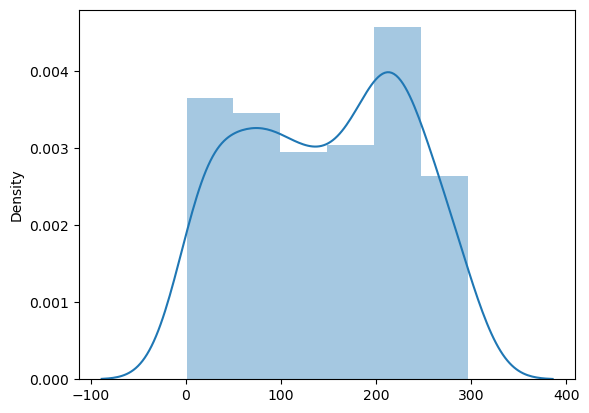

In [17]:
# check the distribution of TV
sns.distplot(x=data.TV,kde=True)

<Axes: ylabel='Density'>

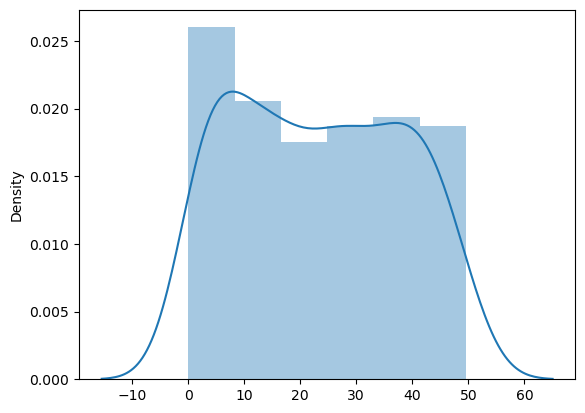

In [20]:
# check the distribution of Radio
sns.distplot(x=data.radio)

<Axes: ylabel='Density'>

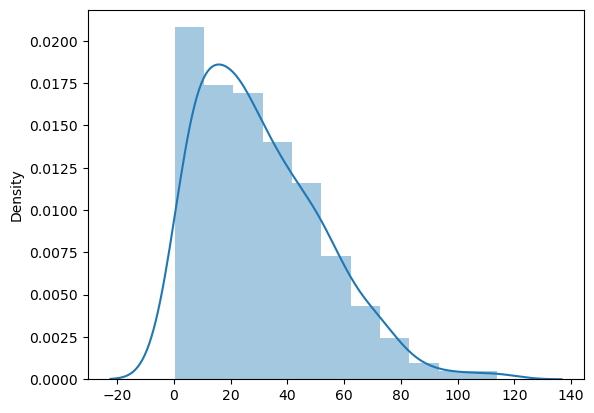

In [21]:
# check the distribution of Newspaper
sns.distplot(x=data.newspaper,kde=True)

<Axes: ylabel='Density'>

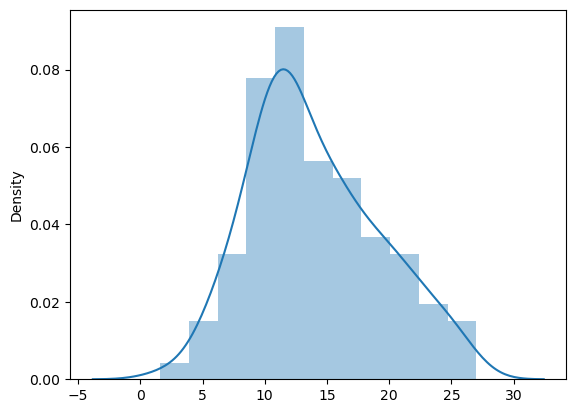

In [22]:
# check the distribution of Sales
sns.distplot(x=data.sales,kde=True)

<Axes: xlabel='TV', ylabel='Count'>

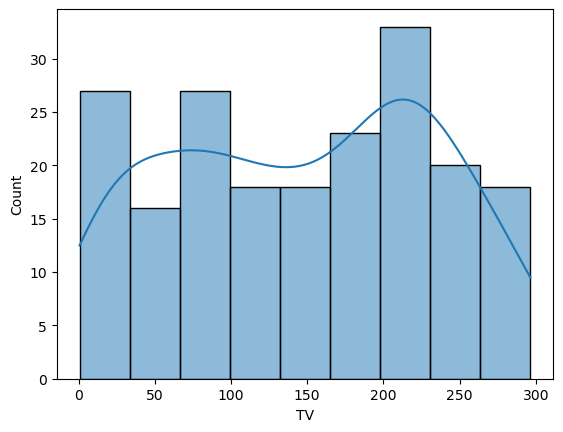

In [23]:
sns.histplot(x=data.TV,kde=True)

<Axes: xlabel='radio', ylabel='Count'>

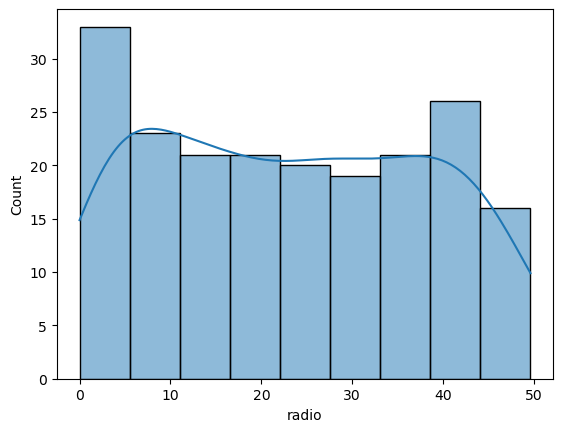

In [24]:
sns.histplot(x=data.radio,kde=True)

<Axes: xlabel='newspaper', ylabel='Count'>

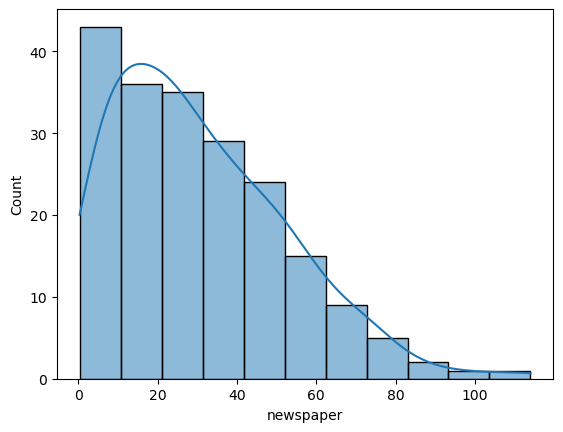

In [25]:
sns.histplot(x=data.newspaper,kde=True)

<Axes: xlabel='sales', ylabel='Count'>

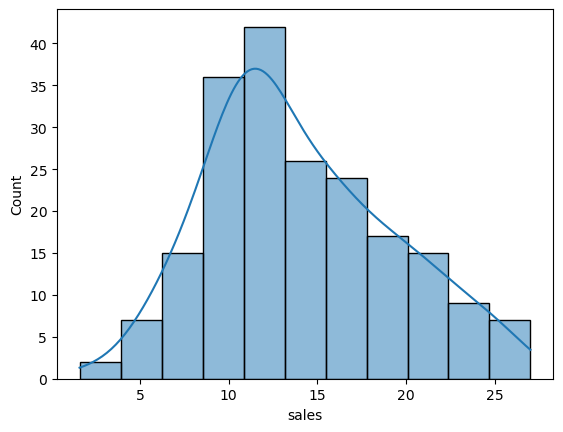

In [26]:
sns.histplot(x=data.sales,kde=True)

# Bivariate Analysis

* Analysing multiple variables.

<Axes: xlabel='TV', ylabel='sales'>

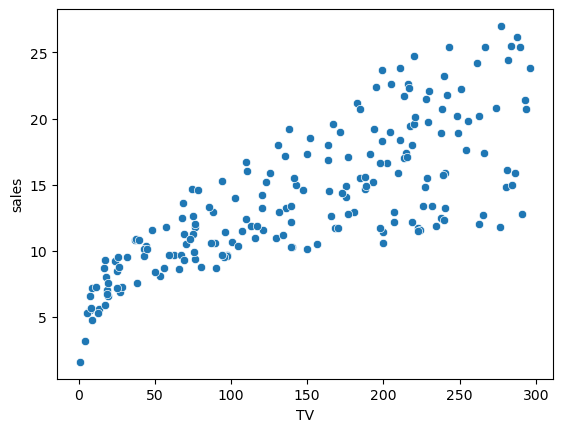

In [31]:
# analyse how amount spent on TV impact sales
sns.scatterplot(data=data,x='TV',y='sales')

<Axes: xlabel='radio', ylabel='sales'>

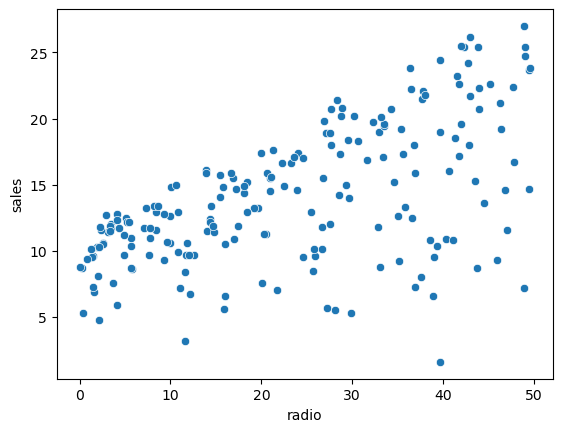

In [32]:
# Analyse how amount spent on Radio impact sales
sns.scatterplot(data=data,x='radio',y='sales')

<Axes: xlabel='newspaper', ylabel='sales'>

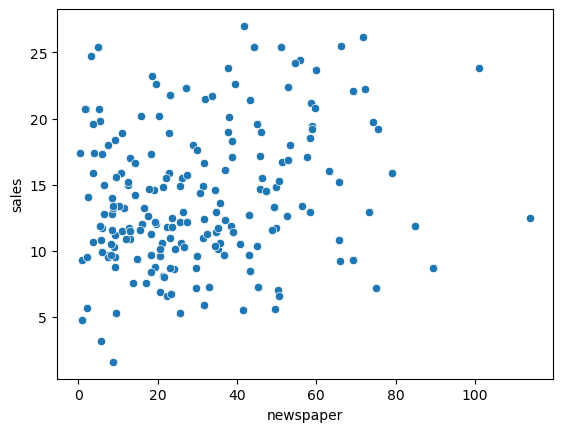

In [33]:
# Analyse how to amount spent on Newspaper impact sales
sns.scatterplot(data=data,x='newspaper',y='sales')

# Insights

* Tv is the best field for advertising the product so that the company can yield more sales.
* Investing in radio will also yield some good sales but investing on newspaper is not really good.

# Multivariate

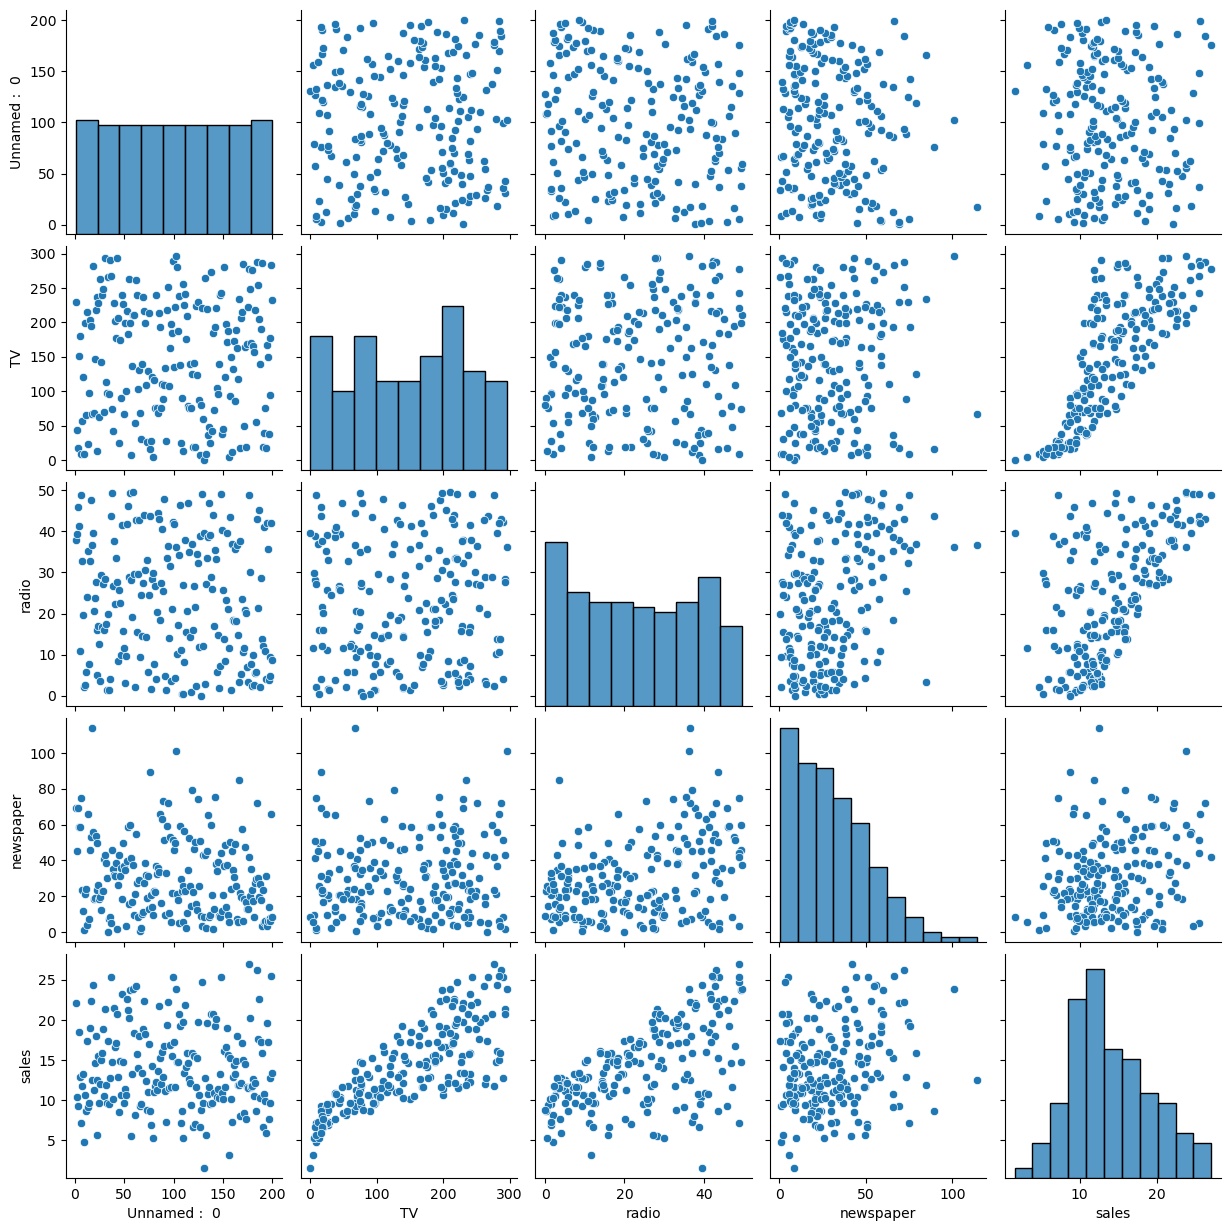

In [35]:
sns.pairplot(data)

In [36]:
data.sales.skew()

0.4075714250767127

# Data preprocessing 

In [37]:
# check for missing values and handle them
data.isnull().sum()

Unnamed :  0    0
TV              0
radio           0
newspaper       0
sales           0
dtype: int64

# Check for duplicates

In [38]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [39]:
data.duplicated().sum()

0

# Check for outliers

<Axes: xlabel='TV'>

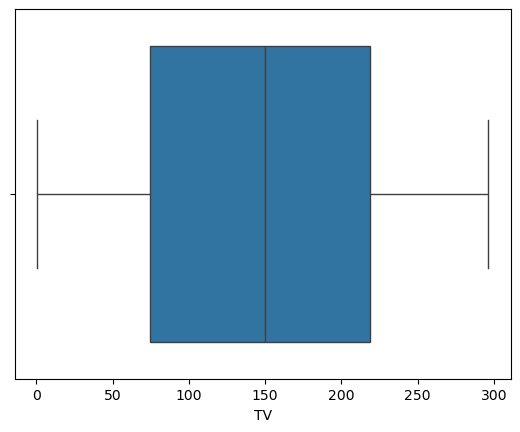

In [40]:
# check outliers on TV
sns.boxplot(x=data.TV)

<Axes: xlabel='radio'>

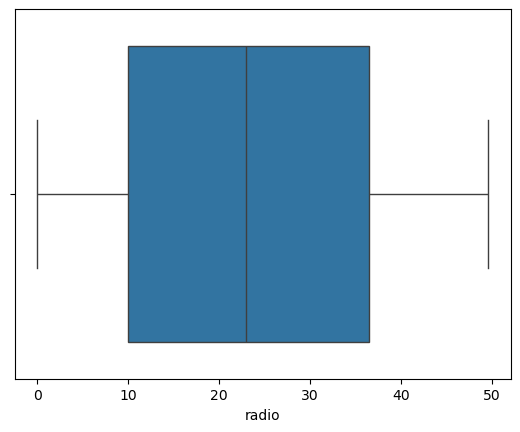

In [41]:
# check outliers on Radio
sns.boxplot(x=data.radio)

<Axes: xlabel='newspaper'>

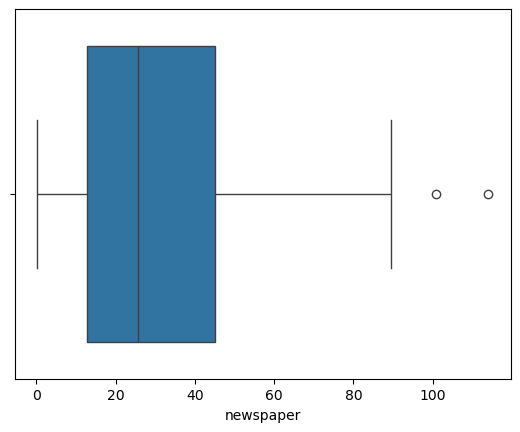

In [42]:
# check outliers on newspaper
sns.boxplot(x=data.newspaper)

<Axes: xlabel='sales'>

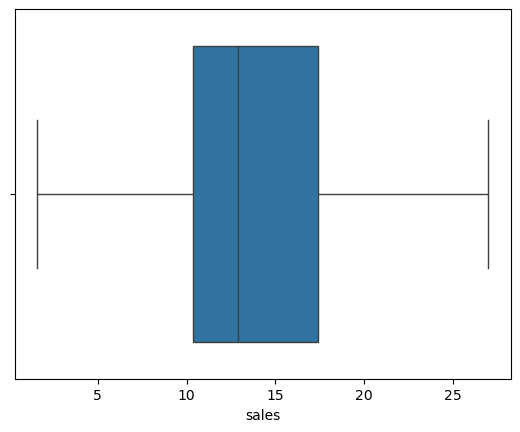

In [43]:
# check ouliers in sales 
sns.boxplot(x=data.sales)